In [1]:
%matplotlib inline

import os
from supporters import *
import SimpleITK as sitk
print(f'SimpleITK version = {sitk.__version__}')

SimpleITK version = 2.3.0


In [2]:
import nibabel as nib
import numpy as np
from stl import mesh
from skimage import measure
from vedo import load, Volume, show, Plotter
from vedo.applications import RayCastPlotter
import os
import SimpleITK as sitk

In [3]:
# "../../data/MM_WHS/ct_train/new_label_1001.nii.gz"
ground_truth = sitk.ReadImage('../../data/PatientsDCM/PAT016/Segmentation.nii', sitk.sitkFloat32)
ground_truth = sitk.GetArrayFromImage(ground_truth)
ground_truth.shape

(235, 512, 512)

In [4]:
explore_3D_array(ground_truth)

interactive(children=(IntSlider(value=117, description='SLICE', max=234), Output()), _dom_classes=('widget-int…

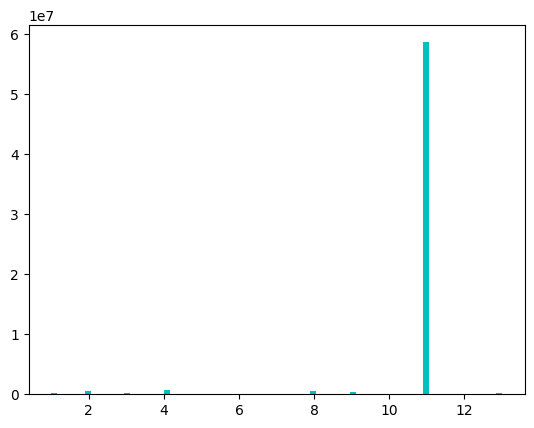

In [5]:
plt.hist(ground_truth.flatten(), bins=80, color='c')
plt.show()

In [6]:
array_1d = ground_truth.flatten()
unique_values, counts = np.unique(array_1d, return_counts=True)
print("Unique values:", unique_values) 
print("Counts:", counts)

Unique values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
Counts: [  174821   488484   150393   656909    32495     8128    54018   504052
   372003    98705 58680454   100207   283171]


In [7]:
# Create a list to store the label arrays for each value
label_arrays = []

# Loop through the unique values
for value in unique_values: 
    # Make a copy of the original array 
    label_array = np.copy(ground_truth) 
    # Set the voxels that do not match the value to zero 
    label_array[np.where(label_array != value)] = 0 
    # Append the label array to the list 
    label_arrays.append(label_array)

# Print the label arrays
for i, label_array in enumerate(label_arrays): 
    print(f"Label {i+1} is a 3D array that contains only pixels with value {unique_values[i]} in array_3d:") 
    print(label_array.shape)

Label 1 is a 3D array that contains only pixels with value 1.0 in array_3d:
(235, 512, 512)
Label 2 is a 3D array that contains only pixels with value 2.0 in array_3d:
(235, 512, 512)
Label 3 is a 3D array that contains only pixels with value 3.0 in array_3d:
(235, 512, 512)
Label 4 is a 3D array that contains only pixels with value 4.0 in array_3d:
(235, 512, 512)
Label 5 is a 3D array that contains only pixels with value 5.0 in array_3d:
(235, 512, 512)
Label 6 is a 3D array that contains only pixels with value 6.0 in array_3d:
(235, 512, 512)
Label 7 is a 3D array that contains only pixels with value 7.0 in array_3d:
(235, 512, 512)
Label 8 is a 3D array that contains only pixels with value 8.0 in array_3d:
(235, 512, 512)
Label 9 is a 3D array that contains only pixels with value 9.0 in array_3d:
(235, 512, 512)
Label 10 is a 3D array that contains only pixels with value 10.0 in array_3d:
(235, 512, 512)
Label 11 is a 3D array that contains only pixels with value 11.0 in array_3d:


In [12]:
def segmented_reconstruction(file_path):
    whole_heart = sitk.ReadImage(file_path, sitk.sitkFloat32)
    whole_heart = sitk.GetArrayFromImage(whole_heart)
    
    whole_heart_flattened = whole_heart.flatten()
    unique_values, counts = np.unique(whole_heart_flattened, return_counts=True)
    
    label_arrays = []

    # Loop through the unique values
    for value in unique_values: 
        label_array = np.copy(whole_heart) 
        label_array[np.where(label_array != value)] = 0
        label_arrays.append(label_array)

    # Loop through classes and create mesh
    for i, label_array in enumerate(label_arrays): 
        # background
        if i == 0:
            continue
        
        verts, faces, normals, values = measure.marching_cubes(label_arrays[i], 0)
        obj_3d = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
        
        for j, f in enumerate(faces):
            obj_3d.vectors[j] = verts[f]

        # Save the STL file with the name and the path
        obj_3d.save(f'../../3D_reconstruction/new_recon/PAT016/cardiac_class_{i}.stl')
        
        
segmented_reconstruction('../../data/PatientsDCM/PAT016/Segmentation.nii')